# Self-study try-it activity 2.1 Using Python to handle missing values

In data analysis, missing values can be both obstacles to insight and clues to deeper patterns. Like detectives piecing together evidence, data scientists must explore data sets to identify, understand and strategically address these gaps.

## 1. Detecting missing values

The first step in handling missing values is to detect them. Let’s explore different methods for identifying missing values in `arrays`, `series` and `DataFrames`. 

- Boolean masking of missing values using Pandas

- Counting missing values

- Visualising missing data

- Checking missing values in `arrays`

- Detecting missing values in `series`

Let's explore the first method.

### a. Boolean masking of missing values using `Pandas`.

The methods `isnull()` and `notnull()` are used to create Boolean masks for missing values. `isnull()` returns `True` for missing values and `False` otherwise, while `notnull()` does the opposite.

In [2]:
import pandas as pd
import numpy as np

# Create a DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 2, 3, None]})

# Detect missing values using isnull() and notnull()
print("DataFrame using isnull():")
print(df.isnull())
print("\nDataFrame using notnull():")
print(df.notnull())


DataFrame using isnull():
       A      B
0  False   True
1  False  False
2   True  False
3  False   True

DataFrame using notnull():
       A      B
0   True  False
1   True   True
2  False   True
3   True  False


### b. Counting missing values

The missing values in a data set are counted using `.sum()` method.

In [3]:
# Assuming 'df' DataFrame from the previous cell is still in memory.
# If you restarted the kernel or are running this cell independently,
# make sure to run the DataFrame creation cell first:
# df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 2, 3, None]})


missing_count = df.isnull().sum()
not_missing_count = df.notnull().sum()

#Compute the missing count
print("missing count")
print(missing_count)

print("not missing count")
print(not_missing_count)

missing count
A    1
B    2
dtype: int64
not missing count
A    3
B    2
dtype: int64


### c. Visualising missing data

Seaborn is a Python library built on top of Matplotlib, designed to simplify the creation of visually appealing and informative statistical graphics. It integrates seamlessly with Pandas' `DataFrames`to support data analysis and visualisation.

One useful plot type is the heatmap, a graphical representation where individual values are displayed as colour gradients. Heatmaps are especially helpful for visualising missing data, correlations or any matrix-like data sets.

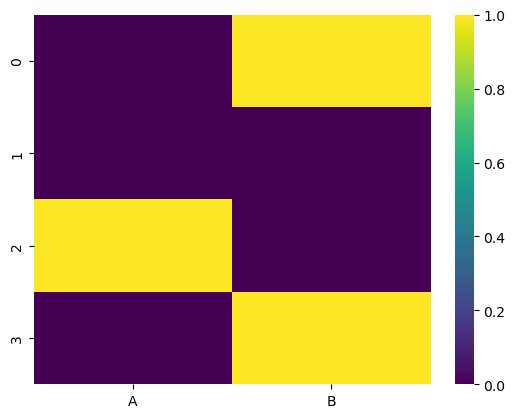

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=True, cmap="viridis") # <-- Modify this line
plt.show()

#Display the heatmap with cbar=True, cmap="viridis". What change do you observe?

### d. Checking missing values in `arrays`

Use NumPy’s `isnan()` function to detect missing values in `arrays`.

In [9]:
#declare an array with missing values and display the presence of null values in the array.

# Assuming numpy is already imported as np from a previous cell,
# but it's good practice to ensure imports are present if running cells independently.
import numpy as np

# Declare an array with missing values.
# np.nan is NumPy's representation for "Not a Number", which indicates a missing value.
array = np.array([1, 2, np.nan, 4, 5, np.nan])

# Display te presence of null values in the array using np.isnan()
print("Original array:", array)
print("Presence of NaN values:", np.isnan(array))


Original array: [ 1.  2. nan  4.  5. nan]
Presence of NaN values: [False False  True False False  True]


### e. Detecting missing values in `series`

Use Pandas' `isna()` function to detect `NaN` values.

In [10]:
series = None # You can remove or comment out this line as it's immediatly overwritten
series = pd.Series([1, None, 3, np.nan])

#Display the missing values in the series.
print("Original Series:\n", series)
print("\nMissing values in Series (using isna():\n", series.isna())

Original Series:
 0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

Missing values in Series (using isna():
 0    False
1     True
2    False
3     True
dtype: bool


## 2. Removing missing values

After detecting missing values in Python, one common approach is to remove them, especially when the missing data is minimal or when it cannot be reasonably imputed. 

The different ways of removal rows and/or column(s) with missing values are:

- Removing rows with missing values

- Removing columns with missing values

- Removing rows or columns based on a threshold

- Removing rows where all values are missing

In [19]:
#Removing rows with missing values. When df.dropna() is used, it removes rows where any column has a missing value.
data = {'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8], 'C': [9, 10, 11, np.nan]}
df = pd.DataFrame(data)
df_cleaned = df.dropna()

print("Original DataFrame:\n", df)
print("\nDataFrame after df.dropna():\n", df_cleaned)

#Explain why df.dropna() results in an empty DataFrame for the given dataset.
# How would the outcome change if only one row had no missing values?"

Original DataFrame:
      A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN

DataFrame after df.dropna():
      A    B    C
0  1.0  5.0  9.0


In [20]:
#Removing Columns with Missing Values. If entire columns contain many missing values, they can be dropped using dropna(axis=1).
df_cleaned_columns = df.dropna(axis=1) # Specify axis=1 to drop columns

#Explain why df.dropna(axis=1) results in a DataFrame with no columns for the given dataset.
# How would the outcome change if one column had no missing values?"


print("Original DataFrame:\n", df)
print("\nDataFrame after df.dropna(axis=1):\n", df_cleaned_columns)

# Explain why df.dropna(axis=1) results in a DataFrame with no columns for the given dataset.
# How would the outcome change if one column had no missing values?

Original DataFrame:
      A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN

DataFrame after df.dropna(axis=1):
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [28]:
#Removing Rows/Columns Based on Threshold.
#The threshold for the minimum number of non-missing values required in a row or column can be specified using the `thresh` parameter.
df_cleaned_threshold = df.dropna(axis=0, thresh=2)
print(df_cleaned_threshold)
#Comment on what happens when `thresh=3`. Give your reasoning.

     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN


In [34]:
#Removing Rows Where All Values Are Missing
#To remove rows where all columns are missing, use how='all'.
df_cleaned_all = df.dropna(how='all')

#"Explain the difference between using how='any' and how='all' in dropna()
#df_cleaned_any = df.dropna(how='any')



print("Original DataFrame:\n", df)
print("\nDataFrame after df.dropna(how='all'):\n", df_cleaned_all)

# Explain the difference between using how='any' and how='all' in dropna()

Original DataFrame:
      A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN

DataFrame after df.dropna(how='all'):
      A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN


In [37]:
#Removing Columns Where All Values Are Missing.
# Columns where all entries are missing can be dropped by setting axis=1 and how='all'
df_all_nan_columns_removed = df.dropna(axis=1, how='any')

print("Original DataFrame with all-NaN column:\n", df)
print("\nDataFrame after df.dropna(axis=1, how='any'):\n", df_all_nan_columns_removed)

# Explain the scenarios in which you would use dropna(axis=1, how='all') to remove columns.
# Provide examples of when this approach is beneficial for data preprocessing.

Original DataFrame with all-NaN column:
      A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN

DataFrame after df.dropna(axis=1, how='any'):
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


## 3. Imputing missing values

Imputing missing values involves replacing `NaN` or missing entries in a data set with appropriate values to ensure the data set remains usable for analysis or modelling. Imputing can be done in a variety of ways, such as:

- Imputing with the mean or the median

- Imputing with the mode

- Imputing with the constant value

- Imputing with `SimpleImputer`

- Forward or backward fill

### a. Imputing with the mean or the median

Imputing with the mean is a common technique for numerical data, where the mean of the column replaces missing values. This approach is suitable when the proportion of missing data is small and the mean does not significantly distort the overall distribution.

Imputing with the median is a better choice when the data contains outliers that could skew the mean, as the median is less sensitive to extreme values and provides a more robust estimate.

In [38]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8], 'C':[156,200,np.nan,5]})

# Impute with the mean
df_imputed_mean = df.fillna(df.mean())

# Impute with the median
df_imputed_median = df.fillna(df.median())

print("Original DataFrame:\n", df)
print("\nDataFrame Imputed with Mean:\n", df_imputed_mean)
print("\nDataFrame Imputed with Median:\n", df_imputed_median)

#Compare the results of using mean() and median() for imputation. How do the imputed values differ, and what might cause these differences?
#With the addition of column 'C' containing values [156, 200, np.nan, 5],
#Explain why you would prefer to use either mean() or median() for imputation. Consider the impact of outliers on your choice."

Original DataFrame:
      A    B      C
0  1.0  5.0  156.0
1  2.0  NaN  200.0
2  NaN  7.0    NaN
3  4.0  8.0    5.0

DataFrame Imputed with Mean:
           A         B           C
0  1.000000  5.000000  156.000000
1  2.000000  6.666667  200.000000
2  2.333333  7.000000  120.333333
3  4.000000  8.000000    5.000000

DataFrame Imputed with Median:
      A    B      C
0  1.0  5.0  156.0
1  2.0  7.0  200.0
2  2.0  7.0  156.0
3  4.0  8.0    5.0


### b. Imputing with the mode

You can use the mode to impute the missing values for categorical data, where the missing values are replaced with the mode (the most frequent value).

In [41]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'Category': ['A', 'B', np.nan, 'A', 'C', np.nan]})

# Impute missing values with mode
# .mode()[0] is used because .mode() can return a Series if there are multiple modes,
# so we pick the first one.
df_new = df['Category'].fillna(df['Category'].mode()[0])

print("Original DataFrame:\n", df)
print("\nDataFrame Imputed with Mode (Series):\n", df_new)
print("\nOriginal 'A' count:", df['Category'].value_counts().get('A', 0))
print("New 'A' count:", df_new.value_counts().get('A', 0))

#Compare the count of 'A' in the original DataFrame and in df_new.
#How does imputing missing values with the mode affect the frequency of 'A'?

Original DataFrame:
   Category
0        A
1        B
2      NaN
3        A
4        C
5      NaN

DataFrame Imputed with Mode (Series):
 0    A
1    B
2    A
3    A
4    C
5    A
Name: Category, dtype: object

Original 'A' count: 2
New 'A' count: 4


### c. Imputing with the constant value

Use this method when you want to assign a default value to indicate the missing data explicitly.

In [42]:
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})

# Replace NaN in numerical column with a constant value (e.g., -1)
df_constant = df.fillna(-1) # This applies -1 to all NaN values in the DataFrame

print("Original DataFrame:\n", df)
print("\nDataFrame After Constant Imputation (with -1):\n", df_constant)

#What happens when you replace missing values (NaN) in a numerical column with a constant value like 10?
#Compare the original DataFrame and the resulting DataFrame after imputation.
#How might this approach affect subsequent data analysis or modeling?"

Original DataFrame:
      A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  7.0
3  4.0  8.0

DataFrame After Constant Imputation (with -1):
      A    B
0  1.0  5.0
1  2.0 -1.0
2 -1.0  7.0
3  4.0  8.0


### d. Imputing with `SimpleImputer`

`SimpleImputer` is a class in the `scikit-learn` library used to handle missing values in data sets by replacing them with specific imputed values. It provides a systematic way to fill in missing data using strategies like mean, median, most frequent value (mode) or constant value. It works seamlessly with machine learning pipelines.

In [2]:
import pandas as pd
import numpy as np # Ensure numpy is imported for np.nan
from sklearn.impute import SimpleImputer

# Create a DataFrame with missing values
df = pd.DataFrame({'Age': [25, 30, np.nan, 35], 'Salary': [50000, np.nan, 60000, 65000]})

print("Original DataFrame:\n", df)

# Instantiate SimpleImputer with strategy='mean'
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')


# Apply imputation
df_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)

print("\nDataFrame After Mean Imputation:\n", df_imputed_mean)

#Use strategy='median' and compare the difference between mean imputer and median imputer
imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_imputed_median = pd.DataFrame(imputer_median.fit_transform(df), columns=df.columns) # Apply to original df

print("\nDataFrame After Median Imputation:\n", df_imputed_median)

Original DataFrame:
     Age   Salary
0  25.0  50000.0
1  30.0      NaN
2   NaN  60000.0
3  35.0  65000.0

DataFrame After Mean Imputation:
     Age        Salary
0  25.0  50000.000000
1  30.0  58333.333333
2  30.0  60000.000000
3  35.0  65000.000000

DataFrame After Median Imputation:
     Age   Salary
0  25.0  50000.0
1  30.0  60000.0
2  30.0  60000.0
3  35.0  65000.0


### e. Predictive imputation

Predictive imputation is a common technique for handling missing data in large data sets. Using machine learning models to estimate missing values based on feature relationships ensures data integrity and improves downstream analysis accuracy. However, it requires careful model selection and computational resources to handle large-scale data effectively.

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a DataFrame with missing values (fresh start for this section)
df_original_for_imputation = pd.DataFrame({
    'Age': [25, 30, np.nan, 35], 
    'Salary': [50000, np.nan, 60000, 65000], 
    'Experience': [2, 5, 7, np.nan]})

print("Original DataFrame:\n", df_original_for_imputation)

# --- Original code for Salary imputation (provided in notebook, included for context) ---
# Separate rows with and without missing values for the 'Salary' column
train_data_salary = df_original_for_imputation[df_original_for_imputation['Salary'].notnull()]
test_data_salary = df_original_for_imputation[df_original_for_imputation['Salary'].isnull()]

# Train a regression model to predict 'Salary' based on other columns
model_salary = LinearRegression()
# Fill NaNs in predictors temporarily for the training data
X_train_salary = train_data_salary[['Age', 'Experience']].fillna(0)
y_train_salary = train_data_salary['Salary']
model_salary.fit(X_train_salary, y_train_salary)

# Predict missing 'Salary' values
X_test_salary = test_data_salary[['Age', 'Experience']].fillna(0)
predicted_salary = model_salary.predict(X_test_salary)

# Impute the predicted values into the original DataFrame (this modifies df_original_for_imputation)
df_original_for_imputation.loc[df_original_for_imputation['Salary'].isnull(), 'Salary'] = predicted_salary
print("\nDataFrame After Predictive Imputation (Salary):\n", df_original_for_imputation)

# --- CORRECTED CODE FOR AGE IMPUTATION (Your Task) ---
# Make a fresh copy of the *original* DataFrame to work on for Age imputation, 
# ensuring it's not affected by potential previous modifications (like the Salary imputation above).
df_for_age_imputation = df_original_for_imputation.copy()

# 1. Separate rows for training (where 'Age' is NOT null) and testing/prediction (where 'Age' IS null).
train_for_age = df_for_age_imputation[df_for_age_imputation['Age'].notnull()]
predict_for_age = df_for_age_imputation[df_for_age_imputation['Age'].isnull()]

# 2. Define predictors (X) and target (y) for the Age prediction model. Predictors: 'Salary' and 'Experience' Target: 'Age'
X_age_train = train_for_age[['Salary', 'Experience']]
y_age_train = train_for_age['Age']

# IMPORTANT: Handle missing values in the predictors (X_age_train) if necessary, before training the imputation model. 
# For this small example, let's drop rows with NaNs in X_age_train. 
# In real-world, you might use SimpleImputer on X_age_train first.
X_age_train_cleaned = X_age_train.dropna()
y_age_train_cleaned = y_age_train[X_age_train_cleaned.index] # Keep y_age_train aligned with X_age_train_cleaned

# 3. Train a Linear Regression model to predict 'Age'.
model_age_imputation = LinearRegression()
model_age_imputation.fit(X_age_train_cleaned, y_age_train_cleaned)

# 4. Prepare data for prediction: Select 'Salary' and 'Experience' from the 'predict_for_age' subset.
#    Handle any NaNs in these predictor columns themselves if they exist in the 'predict_for_age' part.
#    For example, if Salary/Experience were missing in a row where Age is also missing.
X_age_predict = predict_for_age[['Salary', 'Experience']].fillna(0) # Fill NaNs in predictors for consistency if needed

# 5. Predict the missing 'Age' values.
predicted_ages = model_age_imputation.predict(X_age_predict)

# 6. Impute the predicted 'Age' values back into the DataFrame.
df_age_imputed_result = df_for_age_imputation.copy() # Make a copy to show final state cleanly
df_age_imputed_result.loc[df_age_imputed_result['Age'].isnull(), 'Age'] = predicted_ages

print("\nDataFrame After Predictive Imputation (Age column):\n", df_age_imputed_result)

Original DataFrame:
     Age   Salary  Experience
0  25.0  50000.0         2.0
1  30.0      NaN         5.0
2   NaN  60000.0         7.0
3  35.0  65000.0         NaN

DataFrame After Predictive Imputation (Salary):
     Age        Salary  Experience
0  25.0  50000.000000         2.0
1  30.0  58688.362919         5.0
2   NaN  60000.000000         7.0
3  35.0  65000.000000         NaN

DataFrame After Predictive Imputation (Age column):
          Age        Salary  Experience
0  25.000000  50000.000000         2.0
1  30.000000  58688.362919         5.0
2  30.754824  60000.000000         7.0
3  35.000000  65000.000000         NaN
